In [1]:
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance
from sys import argv

import matplotlib.pyplot as plt

In [2]:
# I prefer these LaTeX plots to fit in with the paper better
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [3]:
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')

In [4]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 0
print(index)

root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*d2s*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

0
d2s-t5-small-5.pkl


In [5]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 1
print(index)

root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*d2s*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

1
d2s-t5-base-5.pkl


In [6]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 2
print(index)

root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*d2s*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

2
mt-t5-small-5-multicorp.pkl


In [7]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 2
print(index)

root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*d2s*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

2
mt-t5-small-5-multicorp.pkl


In [8]:
OUTPUT_PATH = root_path / "pipeline/scores" / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/mt-t5-small-5-multicorp')

In [9]:
test_predictions = pd.read_pickle(pkl)
is_mt = False
if 'mt' in pkl.name:
  test_predictions = test_predictions[test_predictions.task == 'd2s']
  is_mt = True
test_predictions

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded
87,15192,0,test,Airport,697,d2s 0: The runway length at Andrews County air...,Andrews County Airport|location|Texas; Andrews...,d2s,"[5954, 7, 1334, 5735, 9175, 14836, 9175, 13598...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 37, 22750, 2475, 4...","[0, 3, 26, 357, 7, 209, 10, 5954, 7, 1334, 573...",d2s 1: Andrews County Airport is located in Te...
89,15192,1,test,Airport,697,"d2s 1: Located in Texas, Andrews County Airpor...",Andrews County Airport|location|Texas; Andrews...,d2s,"[5954, 7, 1334, 5735, 9175, 14836, 9175, 13598...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 3, 8691, 16, 2514, 6,...","[0, 3, 26, 357, 7, 209, 10, 5954, 7, 1334, 573...",d2s 1: Andrews County Airport is located in Te...
91,15192,2,test,Airport,697,d2s 2: Andrews County Airport is located in Te...,Andrews County Airport|location|Texas; Andrews...,d2s,"[5954, 7, 1334, 5735, 9175, 14836, 9175, 13598...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 204, 10, 5954, 7, 1334, 5735, ...","[0, 3, 26, 357, 7, 209, 10, 5954, 7, 1334, 573...",d2s 1: Andrews County Airport is located in Te...
111,14857,0,test,WrittenWork,362,d2s 0: Eric Flint is the author of 1634: The R...,1634: The Ram Rebellion|author|Eric Flint,d2s,"[898, 3710, 10, 37, 4425, 24438, 7325, 9175, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[3, 26, 357, 7, 3, 632, 10, 6964, 29612, 19, 8...","[0, 3, 26, 357, 7, 209, 10, 6964, 29612, 19, 8...",d2s 1: Eric Flint is the author of 1634: The R...
113,14857,1,test,WrittenWork,362,"d2s 1: Eric Flint wrote the book ""1634: The Ra...",1634: The Ram Rebellion|author|Eric Flint,d2s,"[898, 3710, 10, 37, 4425, 24438, 7325, 9175, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[3, 26, 357, 7, 209, 10, 6964, 29612, 2832, 8,...","[0, 3, 26, 357, 7, 209, 10, 6964, 29612, 19, 8...",d2s 1: Eric Flint is the author of 1634: The R...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94697,14839,0,test,SportsTeam,344,d2s 0: Jens Hartel has represented the club FC...,Jens Hartel|club|FC Sachsen Leipzig,d2s,"[9101, 7, 3504, 1625, 9175, 13442, 9175, 5390,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 26, 357, 7, 3, 632, 10, 9101, 7, 3504, 162...","[0, 3, 26, 357, 7, 209, 10, 9101, 7, 3504, 162...",d2s 1: Jens Hartel plays for FC Sachsen Leipzig.
94699,14839,1,test,SportsTeam,344,d2s 1: Jens Hartel played for FC Sachsen Leipzig.,Jens Hartel|club|FC Sachsen Leipzig,d2s,"[9101, 7, 3504, 1625, 9175, 13442, 9175, 5390,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 26, 357, 7, 209, 10, 9101, 7, 3504, 1625, ...","[0, 3, 26, 357, 7, 209, 10, 9101, 7, 3504, 162...",d2s 1: Jens Hartel plays for FC Sachsen Leipzig.
94703,15119,0,test,Politician,624,d2s 0: Alberto Teisaire worked as the Provisio...,"Alberto Teisaire|office (worked at, worked as)...",d2s,"[11375, 32, 2255, 159, 2378, 9175, 19632, 41, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 11375, 32, 2255, 1...","[0, 3, 26, 357, 7, 209, 10, 11375, 32, 2255, 1...",d2s 1: Alberto Teisaire was a Provisional Pres...
94705,15119,1,test,Politician,624,d2s 1: Alberto Teisaire worked as a Provisiona...,"Alberto Teisaire|office (worked at, worked as)...",d2s,"[11375, 32, 2255, 159, 2378, 9175, 19632, 41, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 11375, 32, 2255, 159,...","[0, 3, 26, 357, 7, 209, 10, 11375, 32, 2255, 1...",d2s 1: Alberto Teisaire was a Provisional Pres...


In [10]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[y], use_stemmer=False, use_aggregator=False)
compute_rouge(["general kenobi"], "general kenobi")
y_pred = (
  test_predictions.drop(columns=['input_ids','attention_mask','pred_ids','labels'])
)

# we trained record by record but are evalating by test index,
# so chunk up the indices as appropriate

def conditional_cleaning(x):
  if is_mt:
    lead_trim = 7 # remove "d2s 0:" string identifier from start
    return [
      seq(x).map(get.sd).map(lambda x: x[lead_trim:]).to_list(),
      seq(x).map(get.decoded).to_list()[0][lead_trim:]
    ]
  else:
    return [
      seq(x).map(get.nl).to_list(),        # gather up all of the references
      seq(x).map(get.decoded).to_list()[0] # and the first prediction
    ]

chunked = (
  seq(y_pred.to_dict('records'))
    .group_by(get.record_idx)
    .map(get[1]) # focus on teh values
    .map(conditional_cleaning)
)
chunked

"['The runway length at Andrews County airport ( located in Texas and 973.0 above sea level), is 1773.0.', 'Located in Texas, Andrews County Airport, is 973.0 above sea level and has a runway length of 1773 metres.', 'Andrews County Airport is located in Texas and is 973 metres above sea level. Its runway length is 1773.0.']",Andrews County Airport is located in Texas and is 973 metres above sea level. It has a runway length of 1773.0.
"['Eric Flint is the author of 1634: The Ram Rebellion.', 'Eric Flint wrote the book ""1634: The Ram Rebellion"".', '1634: The Ram Rebellion was written by Eric Flint.']",Eric Flint is the author of 1634: The Ram Rebellion.
"['English is spoken in Texas, United States. Austin is the capital of Texas, which is also the location of Amarillo, Potter County.', 'English is spoken in US state of Texas, where the capital is Austin. Texas is home to Amarillo, which is part of Potter County.', 'The United States town of Amarillo is in Potter County, Texas where English is spoken and Austin is the capital.']","Amarillo is part of Potter County, Texas, United States. The capital of Texas is Austin. English is spoken in Texas."
"[""Akeem Priestley's club is RoPS which plays in the Veikkausliiga."", 'Akeem Priestley plays for the club RoPS in the Veikkausliiga league.', 'Akeem Priestley played for club RoPS in the Veikkausliiga.']",Akeem Priestley plays for RoPS in the Veikkausliiga league.
"['Alfredo Zitarrosa, whose background was as a solo singer, is a performer of Taquirari.', 'Alfredo Zitarrosa started out as a solo singer and is an exponent of Taquirari.', ""Singer Alfredo Zitarrosa's musical genre is Taquirari.""]",Alfredo Zitarrosa is a solo singer who performs Taquirari music.
"['AC Hotel Bella Sky Copenhagen is in Denmark where the leader is Lars Lokke Rasmussen and Greenlandic is one of the languages spoken there. The tenant of the AC Hotel Bella Sky Copenhagen is the Marriott International Hotel which was founded in Washington, D.C.', 'Marriott International, founded in Washington DC, is a tenant of AC Hotel Bella Sky located in Copenhagen, Denmark (which is led by Lars Lokke Rasmussen and has Greenlandic as a spoken language).']",The tenant of AC Hotel Bella Sky Copenhagen is Marriott International which was founded in Washington DC and is located in Denmark. The leader of Denmark is Lars Lokke Rasmussen. Greenlandic is spoken in Denmark.
"['Abradab, an artist for the band Kaliber 44, is associated with Magik (rapper).', 'Abradab played with the band Kaliber 44 and is associated with the rapper Magik.', 'Abradab is an artist for the band Kaliber 44 and he is associated with the rapper Magik.']",Abradab is associated with the band Magik (rapper) and the band Kaliber 44.
"['The capital of Romania is Bucharest.', 'Bucharest is the capital of Romania.']",The capital of Romania is Bucharest.
"['AMC Matador is manufactured by American Motors where Roy D Chapin Jr is a key person and was succeeded ny Eagle.', 'The AMC Matador is made by American Motors who has a key person called Roy D Chapin. The AMC was succeeded by the Eagle Co.', 'Roy D Chapin Jr is a key person at American Motors, which was succeeded by Eagle and built the AMC Matador.']","The AMC Matador is manufactured by American Motors, a company that manufactures the Eagle. The key person of American Motors is Joe D Chapin Jr."
"['James Craig Watson, a Canadian who went to the University of Michigan, found 103 Hera. 103 Hera has a periapsis measurement of 371240000.0 (kilometres). Mr. Watson died in Madison, Wisconsin.', '103 Hera was discovered by James Craig Watson, a Canadian who studied at the University of Michigan and died in Madison, Wisconsin. Its periapsis is 371240000.0km.', 'Canadian James Craig Watson discovered 103 Hera which has a periapsis of 371,240,000 kilometres. He studied at the University of Michigan and died in Madison, Wisconsin.']","103 Hera was discovered by James Craig Watson, who was a Canadian. He graduated from th

In [11]:
rouge_scores = (
  chunked.starmap(compute_rouge)
    # only one rouge per sample, so take the first of the values
    .map(lambda x: seq(x.items()).starmap(lambda x,y : {x:y[0]}))
    # rolling union on dictionaries since they are disjoint
    .map(lambda x: seq(x).reduce(lambda x, y: x | y))
    .to_pandas()
)
rouge_scores

,rouge1,rouge2,rougeL,rougeLsum
0,0.952381,0.750000,0.857143,0.857143
1,1.000000,1.000000,1.000000,1.000000
2,0.857143,0.523810,0.428571,0.428571
3,0.900000,0.777778,0.900000,0.900000
4,0.583333,0.363636,0.500000,0.500000
...,...,...,...,...
1595,0.771930,0.530612,0.627451,0.627451
1596,0.823529,0.625000,0.764706,0.764706
1597,0.827586,0.571429,0.758621,0.758621
1598,0.857143,0.666667,0.857143,0.857143


In [12]:
rouge_scores.describe()

,rouge1,rouge2,rougeL,rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.831926,0.647188,0.730302,0.730302
std,0.116847,0.203103,0.174824,0.174824
min,0.266667,0.000000,0.235294,0.235294
25%,0.756757,0.500000,0.600000,0.600000
50%,0.833333,0.631579,0.722813,0.722813
75%,0.916667,0.775510,0.871795,0.871795
max,1.000000,1.000000,1.000000,1.000000


In [13]:
bleu = load('sacrebleu')
bleu
compute_bleu = lambda x,y: bleu.compute(references=[x], predictions=[y],lowercase=True, tokenize='intl')

In [14]:
bleu_scores = (
  chunked.starmap(compute_bleu)
    .to_pandas()
)

In [15]:
bleu_scores

,score,counts,totals,precisions,bp,sys_len,ref_len
0,83.335215,"[21, 18, 16, 14]","[22, 21, 20, 19]","[95.45454545454545, 85.71428571428571, 80.0, 7...",1.000000,22,22
1,100.000000,"[12, 11, 10, 9]","[12, 11, 10, 9]","[100.0, 100.0, 100.0, 100.0]",1.000000,12,12
2,59.975281,"[23, 21, 14, 8]","[25, 24, 23, 22]","[92.0, 87.5, 60.869565217391305, 36.3636363636...",0.923116,25,27
3,78.562930,"[10, 8, 6, 4]","[10, 9, 8, 7]","[100.0, 88.88888888888889, 75.0, 57.1428571428...",1.000000,10,10
4,21.200627,"[8, 4, 1, 0]","[11, 10, 9, 8]","[72.72727272727273, 40.0, 11.11111111111111, 6...",1.000000,11,10
...,...,...,...,...,...,...,...
1595,22.830213,"[19, 11, 4, 1]","[21, 20, 19, 18]","[90.47619047619048, 55.0, 21.05263157894737, 5...",0.826565,21,25
1596,45.573578,"[16, 11, 6, 3]","[18, 17, 16, 15]","[88.88888888888889, 64.70588235294117, 37.5, 2...",1.000000,18,18
1597,56.872167,"[27, 19, 14, 11]","[31, 30, 29, 28]","[87.09677419354838, 63.333333333333336, 48.275...",1.000000,31,31
1598,59.460356,"[7, 5, 3, 2]","[8, 7, 6, 5]","[87.5, 71.42857142857143, 50.0, 40.0]",1.000000,8,8


In [16]:
bertscore = load('bertscore')
compute_bert = lambda x,y: bertscore.compute(predictions=[y], references=[x], lang="en", model_type="distilbert-base-uncased" )

In [17]:
bert_scores = (
 chunked
   .starmap(compute_bert)
   .to_pandas()
   .drop(columns='hashcode')
   .applymap(np.mean)
)

In [18]:
prepend_name_to_cols = lambda x,y : x.rename(columns=lambda e: y+"_"+e)
prepend_name_to_cols(bert_scores, 'bert')
all_scores = (
  seq(bert_scores, bleu_scores, rouge_scores)
    .zip(['bert','bleu','rouge'])
    .starmap(prepend_name_to_cols)
)
unflt = pd.DataFrame(chunked, columns=['references','predictions'])
scores_df = pd.concat(all_scores, axis=1)
scores_df

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
0,0.977183,0.989205,0.983157,83.335215,"[21, 18, 16, 14]","[22, 21, 20, 19]","[95.45454545454545, 85.71428571428571, 80.0, 7...",1.000000,22,22,0.952381,0.750000,0.857143,0.857143
1,1.000000,1.000000,1.000000,100.000000,"[12, 11, 10, 9]","[12, 11, 10, 9]","[100.0, 100.0, 100.0, 100.0]",1.000000,12,12,1.000000,1.000000,1.000000,1.000000
2,0.909018,0.891767,0.900310,59.975281,"[23, 21, 14, 8]","[25, 24, 23, 22]","[92.0, 87.5, 60.869565217391305, 36.3636363636...",0.923116,25,27,0.857143,0.523810,0.428571,0.428571
3,0.994435,0.977182,0.985733,78.562930,"[10, 8, 6, 4]","[10, 9, 8, 7]","[100.0, 88.88888888888889, 75.0, 57.1428571428...",1.000000,10,10,0.900000,0.777778,0.900000,0.900000
4,0.941600,0.917643,0.917448,21.200627,"[8, 4, 1, 0]","[11, 10, 9, 8]","[72.72727272727273, 40.0, 11.11111111111111, 6...",1.000000,11,10,0.583333,0.363636,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.942532,0.927846,0.935131,22.830213,"[19, 11, 4, 1]","[21, 20, 19, 18]","[90.47619047619048, 55.0, 21.05263157894737, 5...",0.826565,21,25,0.771930,0.530612,0.627451,0.627451
1596,0.943987,0.944975,0.944481,45.573578,"[16, 11, 6, 3]","[18, 17, 16, 15]","[88.88888888888889, 64.70588235294117, 37.5, 2...",1.000000,18,18,0.823529,0.625000,0.764706,0.764706
1597,0.966222,0.961693,0.963952,56.872167,"[27, 19, 14, 11]","[31, 30, 29, 28]","[87.09677419354838, 63.333333333333336, 48.275...",1.000000,31,31,0.827586,0.571429,0.758621,0.758621
1598,0.982627,0.982627,0.982627,59.460356,"[7, 5, 3, 2]","[8, 7, 6, 5]","[87.5, 71.42857142857143, 50.0, 40.0]",1.000000,8,8,0.857143,0.666667,0.857143,0.857143


In [19]:
scores_preds = pd.concat([scores_df,unflt], axis=1)
scores_preds 

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum,references,predictions
0,0.977183,0.989205,0.983157,83.335215,"[21, 18, 16, 14]","[22, 21, 20, 19]","[95.45454545454545, 85.71428571428571, 80.0, 7...",1.000000,22,22,0.952381,0.750000,0.857143,0.857143,[The runway length at Andrews County airport (...,Andrews County Airport is located in Texas and...
1,1.000000,1.000000,1.000000,100.000000,"[12, 11, 10, 9]","[12, 11, 10, 9]","[100.0, 100.0, 100.0, 100.0]",1.000000,12,12,1.000000,1.000000,1.000000,1.000000,[Eric Flint is the author of 1634: The Ram Reb...,Eric Flint is the author of 1634: The Ram Rebe...
2,0.909018,0.891767,0.900310,59.975281,"[23, 21, 14, 8]","[25, 24, 23, 22]","[92.0, 87.5, 60.869565217391305, 36.3636363636...",0.923116,25,27,0.857143,0.523810,0.428571,0.428571,"[English is spoken in Texas, United States. Au...","Amarillo is part of Potter County, Texas, Unit..."
3,0.994435,0.977182,0.985733,78.562930,"[10, 8, 6, 4]","[10, 9, 8, 7]","[100.0, 88.88888888888889, 75.0, 57.1428571428...",1.000000,10,10,0.900000,0.777778,0.900000,0.900000,[Akeem Priestley's club is RoPS which plays in...,Akeem Priestley plays for RoPS in the Veikkaus...
4,0.941600,0.917643,0.917448,21.200627,"[8, 4, 1, 0]","[11, 10, 9, 8]","[72.72727272727273, 40.0, 11.11111111111111, 6...",1.000000,11,10,0.583333,0.363636,0.500000,0.500000,"[Alfredo Zitarrosa, whose background was as a ...",Alfredo Zitarrosa is a solo singer who perform...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.942532,0.927846,0.935131,22.830213,"[19, 11, 4, 1]","[21, 20, 19, 18]","[90.47619047619048, 55.0, 21.05263157894737, 5...",0.826565,21,25,0.771930,0.530612,0.627451,0.627451,"[The book, A Loyal Character Dancer, has the I...",Qiu Xiaolong is the author of A Loyal Characte...
1596,0.943987,0.944975,0.944481,45.573578,"[16, 11, 6, 3]","[18, 17, 16, 15]","[88.88888888888889, 64.70588235294117, 37.5, 2...",1.000000,18,18,0.823529,0.625000,0.764706,0.764706,"[The hardback book, A Severed Wasp, has 388 pa...",A Severed Wasp is available in hardcover and h...
1597,0.966222,0.961693,0.963952,56.872167,"[27, 19, 14, 11]","[31, 30, 29, 28]","[87.09677419354838, 63.333333333333336, 48.275...",1.000000,31,31,0.827586,0.571429,0.758621,0.758621,"[Amatriciana sauce comes from Italy, where Ita...",Amatriciana sauce is a dish from Italy where t...
1598,0.982627,0.982627,0.982627,59.460356,"[7, 5, 3, 2]","[8, 7, 6, 5]","[87.5, 71.42857142857143, 50.0, 40.0]",1.000000,8,8,0.857143,0.666667,0.857143,0.857143,[Jens Hartel has represented the club FC Sachs...,Jens Hartel plays for FC Sachsen Leipzig.


In [20]:
scores_df.describe()

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.952628,0.945295,0.948014,60.961422,0.955293,21.879375,22.100625,0.831926,0.647188,0.730302,0.730302
std,0.032489,0.036760,0.033749,23.490727,0.088627,11.094447,10.994080,0.116847,0.203103,0.174824,0.174824
min,0.810461,0.802319,0.810992,6.155554,0.367879,5.000000,5.000000,0.266667,0.000000,0.235294,0.235294
25%,0.932748,0.921986,0.924890,44.498017,0.945959,13.000000,13.000000,0.756757,0.500000,0.600000,0.600000
50%,0.953281,0.945699,0.948200,59.989355,1.000000,20.000000,21.000000,0.833333,0.631579,0.722813,0.722813
75%,0.977664,0.972666,0.973505,76.607972,1.000000,29.000000,29.000000,0.916667,0.775510,0.871795,0.871795
max,1.000000,1.000000,1.000000,100.000000,1.000000,73.000000,66.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
scores_df.to_csv(OUTPUT_PATH / "d2s_scores.csv")
scores_df.to_pickle(OUTPUT_PATH / "d2s_scores.pkl")

In [22]:
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/mt-t5-small-5-multicorp')

In [23]:
scores_df.sort_values(by='bleu_score')

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
1507,0.902582,0.842854,0.871696,6.155554,"[8, 3, 0, 0]","[11, 10, 9, 8]","[72.72727272727273, 30.0, 5.555555555555555, 3...",0.441233,11,20,0.500000,0.230769,0.428571,0.428571
274,0.871807,0.868929,0.870366,6.931014,"[29, 9, 0, 0]","[36, 35, 34, 33]","[80.55555555555556, 25.714285714285715, 1.4705...",1.000000,36,33,0.705882,0.212121,0.387097,0.387097
1375,0.925714,0.891182,0.908120,7.621064,"[12, 3, 0, 0]","[14, 13, 12, 11]","[85.71428571428571, 23.076923076923077, 4.1666...",0.651439,14,20,0.666667,0.214286,0.533333,0.533333
847,0.857740,0.859683,0.855509,8.471786,"[9, 2, 0, 0]","[16, 15, 14, 13]","[56.25, 13.333333333333334, 3.5714285714285716...",1.000000,16,14,0.551724,0.166667,0.344828,0.344828
1065,0.823200,0.899942,0.858017,8.516593,"[5, 1, 0, 0]","[12, 11, 10, 9]","[41.666666666666664, 9.090909090909092, 5.0, 2...",1.000000,12,8,0.500000,0.000000,0.375000,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1.000000,1.000000,1.000000,100.000000,"[7, 6, 5, 4]","[7, 6, 5, 4]","[100.0, 100.0, 100.0, 100.0]",1.000000,7,7,1.000000,1.000000,1.000000,1.000000
671,1.000000,1.000000,1.000000,100.000000,"[16, 15, 14, 13]","[16, 15, 14, 13]","[100.0, 100.0, 100.0, 100.0]",1.000000,16,16,1.000000,1.000000,1.000000,1.000000
1461,1.000000,1.000000,1.000000,100.000000,"[19, 18, 17, 16]","[19, 18, 17, 16]","[100.0, 100.0, 100.0, 100.0]",1.000000,19,19,1.000000,1.000000,1.000000,1.000000
717,1.000000,1.000000,1.000000,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10,1.000000,1.000000,1.000000,1.000000


In [24]:
scores_preds.sort_values(by='bleu_score')

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum,references,predictions
1507,0.902582,0.842854,0.871696,6.155554,"[8, 3, 0, 0]","[11, 10, 9, 8]","[72.72727272727273, 30.0, 5.555555555555555, 3...",0.441233,11,20,0.500000,0.230769,0.428571,0.428571,[AFC Blackpool have had Stuart Parker as their...,AFC Blackpool manager Stuart Parker plays for ...
274,0.871807,0.868929,0.870366,6.931014,"[29, 9, 0, 0]","[36, 35, 34, 33]","[80.55555555555556, 25.714285714285715, 1.4705...",1.000000,36,33,0.705882,0.212121,0.387097,0.387097,[Spain's major ethnic group is the Spaniards a...,"Ajoblanco is from Andalusia, Spain, where the ..."
1375,0.925714,0.891182,0.908120,7.621064,"[12, 3, 0, 0]","[14, 13, 12, 11]","[85.71428571428571, 23.076923076923077, 4.1666...",0.651439,14,20,0.666667,0.214286,0.533333,0.533333,"[Found in Mexico, the food, Bionico (with gran...",Bionico is a dessert from Mexico. Granola is a...
847,0.857740,0.859683,0.855509,8.471786,"[9, 2, 0, 0]","[16, 15, 14, 13]","[56.25, 13.333333333333334, 3.5714285714285716...",1.000000,16,14,0.551724,0.166667,0.344828,0.344828,[Akeem Ayers' former team was Tennessee Titans...,"Akeem Ayers, who was drafted 39 times, was a f..."
1065,0.823200,0.899942,0.858017,8.516593,"[5, 1, 0, 0]","[12, 11, 10, 9]","[41.666666666666664, 9.090909090909092, 5.0, 2...",1.000000,12,8,0.500000,0.000000,0.375000,0.375000,"[Addiction journal is about addiction., Addict...",Addiction is a journal that has the academic d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1.000000,1.000000,1.000000,100.000000,"[7, 6, 5, 4]","[7, 6, 5, 4]","[100.0, 100.0, 100.0, 100.0]",1.000000,7,7,1.000000,1.000000,1.000000,1.000000,"[County Limerick is a part of Munster., County...",County Limerick is part of Munster.
671,1.000000,1.000000,1.000000,100.000000,"[16, 15, 14, 13]","[16, 15, 14, 13]","[100.0, 100.0, 100.0, 100.0]",1.000000,16,16,1.000000,1.000000,1.000000,1.000000,[The ALV X-1 has 2 rocket stages and a diamete...,The ALV X-1 has 2 rocket stages and a diameter...
1461,1.000000,1.000000,1.000000,100.000000,"[19, 18, 17, 16]","[19, 18, 17, 16]","[100.0, 100.0, 100.0, 100.0]",1.000000,19,19,1.000000,1.000000,1.000000,1.000000,[A Fortress of Grey Ice is available in print ...,A Fortress of Grey Ice was written by J. V. Jo...
717,1.000000,1.000000,1.000000,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10,1.000000,1.000000,1.000000,1.000000,"[Marietta, Ohio was the birthplace of Agnes Wa...","Agnes Ward White was born in Marietta, Ohio."


In [25]:
zero_bleus = scores_preds[scores_preds.bleu_score == 0]
zero_bleus

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum,references,predictions


In [26]:
zero_bleus.shape

(0, 16)

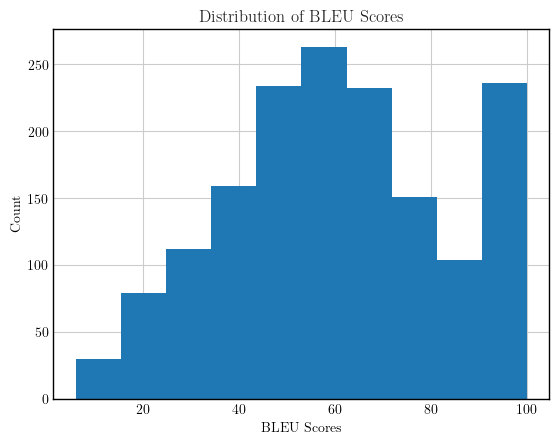

In [27]:
scores_preds.bleu_score.hist()
plt.title("Distribution of BLEU Scores")
plt.xlabel("BLEU Scores")
plt.ylabel("Count")
plt.savefig(OUTPUT_PATH/'bleu_score_dist.svg')

In [28]:
plt.clf()

<Figure size 640x480 with 0 Axes>

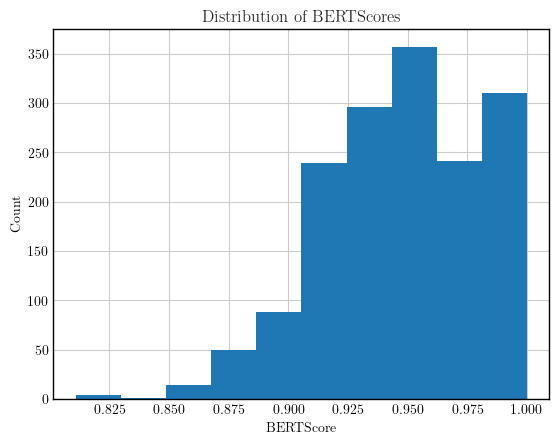

In [29]:
scores_preds.bert_f1.hist()
plt.title("Distribution of BERTScores")
plt.xlabel("BERTScore")
plt.ylabel("Count")
plt.savefig(OUTPUT_PATH/'bertscore_dist.svg')

In [30]:
plt.clf()

<Figure size 640x480 with 0 Axes>

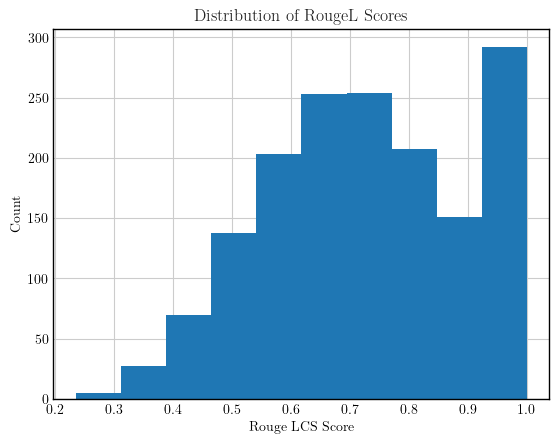

In [31]:
scores_preds.rouge_rougeL.hist()
plt.title("Distribution of RougeL Scores")
plt.xlabel("Rouge LCS Score")
plt.ylabel("Count")
plt.savefig(OUTPUT_PATH/'rouge_dist.svg')

In [32]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [33]:
bad_bleus = scores_df[scores_df.bleu_score < 15]
bad_bleus.describe()

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.889299,0.879825,0.883146,11.405425,0.876934,16.428571,16.642857,0.583616,0.232508,0.440907,0.440907
std,0.036541,0.039294,0.033785,2.532951,0.185880,10.137677,8.832659,0.125125,0.098870,0.122581,0.122581
min,0.810461,0.802319,0.810992,6.155554,0.367879,6.000000,7.000000,0.266667,0.000000,0.235294,0.235294
25%,0.868337,0.860033,0.866937,9.263003,0.795253,10.500000,9.750000,0.500000,0.178030,0.360963,0.360963
50%,0.891219,0.880740,0.878233,12.207329,1.000000,12.000000,13.500000,0.593594,0.240385,0.422619,0.422619
75%,0.909832,0.902460,0.902398,13.555351,1.000000,18.250000,22.000000,0.666667,0.296435,0.520468,0.520468
max,0.951026,0.953877,0.951327,14.958821,1.000000,45.000000,33.000000,0.823529,0.400000,0.705882,0.705882


In [34]:
score_pred = chunked.to_pandas()
print(
  score_pred[scores_df.bleu_score < 15][:10]
  .to_markdown()
)

|     | 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 1                                                                                                                                                                                    |
|----:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------